In [1]:
import pandas as pd
import numpy as np

import re

In [2]:
df = pd.read_csv("SI_Student_Surveys/Spring_2025/Spring_2025_BIOL_10103_Results.csv")

In [3]:
display(df["Default Report"])

0                  Last Modified: 2025-11-04 09:53:02 CST
1                                                     NaN
2                                                     NaN
3                               Overall Helpfulness of SI
4                                                   Field
                              ...                        
1165                   nothing it is working great for me
1166    Make the info more beneficial and go over more...
1167                                                  NaN
1168                                             Nothing 
1169                                                None 
Name: Default Report, Length: 1170, dtype: object

In [4]:
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

Shape: (1170, 7)
Columns: ['Default Report', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6']


In [5]:
# Cell 3: Look at the first 20 rows of the Default Report column
df["Default Report"].head(20)

0                Last Modified: 2025-11-04 09:53:02 CST
1                                                   NaN
2                                                   NaN
3                             Overall Helpfulness of SI
4                                                 Field
5                         Q1. My SI session is helpful.
6                                                   NaN
7                                                Answer
8                                       Unable to judge
9                                     Strongly disagree
10                                  Moderately disagree
11                           Neither disagree nor agree
12                                     Moderately agree
13                                       Strongly agree
14                                                Total
15                                                  NaN
16                            Overall Helpfulness of SI
17                                              

In [6]:
# Cell 4: Search for Q12, Q13, Q14 in the data
data = df["Default Report"].astype(str)

q12_idx = data[data.str.contains("Q12", case=False, na=False)].index.tolist()
q13_idx = data[data.str.contains("Q13", case=False, na=False)].index.tolist()
q14_idx = data[data.str.contains("Q14", case=False, na=False)].index.tolist()

print(f"Q12 found at rows: {q12_idx}")
print(f"Q13 found at rows: {q13_idx}")
print(f"Q14 found at rows: {q14_idx}")

Q12 found at rows: [146, 147]
Q13 found at rows: [491, 492]
Q14 found at rows: [832, 833]


In [7]:
# Cell 5: Inspect Q12 and surrounding rows
if q12_idx:
    start = q12_idx[0]
    print(f"Viewing rows {start} to {start+20}:\n")
    print(df["Default Report"].iloc[start:start+20])

Viewing rows 146 to 166:

146    Q12. How has working collaboratively with your...
147    Q12.  How has working collaboratively with you...
148    Working collaboratively with my SI classmates ...
149                                        It went well!
150    It give me a better understanding of the subject.
151                       I better remember the material
152    It meant that we were all able to help cover k...
153    Collaborating with classmates during SI is is ...
154    It's allowed me to discuss concepts that I was...
155    it has truly allowed me to fully understand ev...
156    It helps me because they explain the concepts ...
157    It helps with memorization and actually applyi...
158                It has helped memorize certain topics
159    It has helped me to get an understanding of co...
160                                              Amazing
161    When I didn't have full understanding on a top...
162    To an extent. Honestly my classmates are not a...
163  

In [8]:
# Cell 6: Extract the responses for each question

# Q12 responses (from 148 to 490)
q12_responses = df["Default Report"].iloc[148:491].dropna().reset_index(drop=True)

In [9]:
# Cell 6: Extract the responses for each question

# Q12 responses (from 148 to 490)
q12_responses = df["Default Report"].iloc[148:491].dropna().reset_index(drop=True)

# Q13 responses (from 493 to 831)
q13_responses = df["Default Report"].iloc[493:832].dropna().reset_index(drop=True)

# Q14 responses (from 834 to end)
q14_responses = df["Default Report"].iloc[834:].dropna().reset_index(drop=True)

print(f"Q12: {len(q12_responses)} responses")
print(f"Q13: {len(q13_responses)} responses")
print(f"Q14: {len(q14_responses)} responses")

Q12: 342 responses
Q13: 289 responses
Q14: 271 responses


In [10]:
# Cell 7: Look at first few responses for each question
print("Q12 - First 5 responses:")
print(q12_responses.head())
print("\n" + "="*50 + "\n")

print("Q13 - First 5 responses:")
print(q13_responses.head())
print("\n" + "="*50 + "\n")

print("Q14 - First 5 responses:")
print(q14_responses.head())

Q12 - First 5 responses:
0    Working collaboratively with my SI classmates ...
1                                        It went well!
2    It give me a better understanding of the subject.
3                       I better remember the material
4    It meant that we were all able to help cover k...
Name: Default Report, dtype: object


Q13 - First 5 responses:
0    More games related to course material, those r...
1                            Nothing, she was amazing.
2                 I don't really have any suggestions.
3    My SI leader was great, but one thing she coul...
4    The only thing that I'd recommend would be to ...
Name: Default Report, dtype: object


Q14 - First 5 responses:
0    Trying to ensure that concepts covered in SI l...
1       The class was great and nothing should change.
2    I can't think of any way to improve the SI pro...
3    I think something that would improve the SI pr...
4    I'd probably have more allotted classes for pe...
Name: Default Report, dt

In [11]:
# Cell 8: Create DataFrames with question context

# Get the actual question text
q12_text = df["Default Report"].iloc[146]
q13_text = df["Default Report"].iloc[491]
q14_text = df["Default Report"].iloc[832]

print("Question texts:")
print(f"Q12: {q12_text}")
print(f"Q13: {q13_text}")
print(f"Q14: {q14_text}")

Question texts:
Q12: Q12. How has working collaboratively with your SI classmates contributed to your understanding of course concepts?
Q13: Q13.  What suggestions do you have for improving your leader's performance?
Q14: Q14.  What suggestions do you have for improving the SI Program overall?


In [12]:
# Cell 9: Create a combined DataFrame for sentiment analysis

# Create individual DataFrames
q12_df = pd.DataFrame({
    'question_id': 'Q12',
    'question_text': q12_text,
    'response': q12_responses
})

q13_df = pd.DataFrame({
    'question_id': 'Q13',
    'question_text': q13_text,
    'response': q13_responses
})

q14_df = pd.DataFrame({
    'question_id': 'Q14',
    'question_text': q14_text,
    'response': q14_responses
})

# Combine all three
sentiment_df = pd.concat([q12_df, q13_df, q14_df], ignore_index=True)

print(f"Total responses: {len(sentiment_df)}")
print(f"\nDataFrame shape: {sentiment_df.shape}")
print(f"\nFirst few rows:")
sentiment_df.head(10)

Total responses: 902

DataFrame shape: (902, 3)

First few rows:


,question_id,question_text,response
0,Q12,Q12. How has working collaboratively with your...,Working collaboratively with my SI classmates ...
1,Q12,Q12. How has working collaboratively with your...,It went well!
2,Q12,Q12. How has working collaboratively with your...,It give me a better understanding of the subject.
3,Q12,Q12. How has working collaboratively with your...,I better remember the material
4,Q12,Q12. How has working collaboratively with your...,It meant that we were all able to help cover k...
5,Q12,Q12. How has working collaboratively with your...,Collaborating with classmates during SI is is ...
6,Q12,Q12. How has working collaboratively with your...,It's allowed me to discuss concepts that I was...
7,Q12,Q12. How has working collaboratively with your...,it has truly allowed me to fully understand ev...
8,Q12,Q12. How has working collaboratively with your...,It helps me because they explain the concepts ...
9,Q12,Q12. How has working collaboratively with your...,It helps with memorization and actually applyi...


In [13]:
sentiment_df["question_text"].unique()

array(['Q12. How has working collaboratively with your SI classmates contributed to your understanding of course concepts?',
       "Q13.  What suggestions do you have for improving your leader's performance?",
       'Q14.  What suggestions do you have for improving the SI Program overall?'],
      dtype=object)

In [14]:
display(sentiment_df)

,question_id,question_text,response
0,Q12,Q12. How has working collaboratively with your...,Working collaboratively with my SI classmates ...
1,Q12,Q12. How has working collaboratively with your...,It went well!
2,Q12,Q12. How has working collaboratively with your...,It give me a better understanding of the subject.
3,Q12,Q12. How has working collaboratively with your...,I better remember the material
4,Q12,Q12. How has working collaboratively with your...,It meant that we were all able to help cover k...
...,...,...,...
897,Q14,Q14. What suggestions do you have for improvi...,I think having more SI class times available w...
898,Q14,Q14. What suggestions do you have for improvi...,nothing it is working great for me
899,Q14,Q14. What suggestions do you have for improvi...,Make the info more beneficial and go over more...
900,Q14,Q14. What suggestions do you have for improvi...,Nothing


In [15]:
sentiment_df["question_text"] = (
    sentiment_df["question_text"]
    .str.replace(r'^\s*Q\d+\.\s*', '', regex=True)
)


In [16]:
display(sentiment_df)

,question_id,question_text,response
0,Q12,How has working collaboratively with your SI c...,Working collaboratively with my SI classmates ...
1,Q12,How has working collaboratively with your SI c...,It went well!
2,Q12,How has working collaboratively with your SI c...,It give me a better understanding of the subject.
3,Q12,How has working collaboratively with your SI c...,I better remember the material
4,Q12,How has working collaboratively with your SI c...,It meant that we were all able to help cover k...
...,...,...,...
897,Q14,What suggestions do you have for improving the...,I think having more SI class times available w...
898,Q14,What suggestions do you have for improving the...,nothing it is working great for me
899,Q14,What suggestions do you have for improving the...,Make the info more beneficial and go over more...
900,Q14,What suggestions do you have for improving the...,Nothing


In [17]:
# Make copy of dataframe
sentiment_df_analysis = sentiment_df.copy()

In [19]:
# Save processed dataframe
sentiment_df_analysis.to_csv("sentiment_df_analysis", index=False)

In [190]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

display(sentiment_df)


,question_id,question_text,response
0,Q12,How has working collaboratively with your SI c...,Working collaboratively with my SI classmates ...
1,Q12,How has working collaboratively with your SI c...,It went well!
2,Q12,How has working collaboratively with your SI c...,It give me a better understanding of the subject.
3,Q12,How has working collaboratively with your SI c...,I better remember the material
4,Q12,How has working collaboratively with your SI c...,It meant that we were all able to help cover k...
5,Q12,How has working collaboratively with your SI c...,Collaborating with classmates during SI is is ...
6,Q12,How has working collaboratively with your SI c...,It's allowed me to discuss concepts that I was...
7,Q12,How has working collaboratively with your SI c...,it has truly allowed me to fully understand ev...
8,Q12,How has working collaboratively with your SI c...,It helps me because they explain the concepts ...
9,Q12,How has working collaboratively with your SI c...,It helps with memorization and actually applyi...


In [191]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()


In [192]:
sentiment_df["sentiment_score"] = (
    sentiment_df["response"]
    .astype(str)
    .apply(lambda x: analyzer.polarity_scores(x)["compound"])
)

avg_sentiment = sentiment_df.groupby("question_id")["sentiment_score"].mean()
print(avg_sentiment)

question_id
Q12    0.333940
Q13    0.269066
Q14    0.169694
Name: sentiment_score, dtype: float64


In [193]:
def classify(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

sentiment_df["sentiment_label"] = sentiment_df["sentiment_score"].apply(classify)

sent_counts = sentiment_df.groupby("question_id")["sentiment_label"].value_counts().unstack(fill_value=0)
print(sent_counts)


sentiment_label  Negative  Neutral  Positive
question_id                                 
Q12                    27       82       233
Q13                    58       71       160
Q14                    38      119       114


In [194]:
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

stop = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/clarasmith/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [195]:
def clean_no_stopwords(x):
    x = re.sub(r"[^a-zA-Z ]", "", x.lower())
    words = x.split()
    words = [w for w in words if w not in stop]
    return " ".join(words)

sentiment_df["clean"] = sentiment_df["response"].astype(str).apply(clean_no_stopwords)


In [196]:
positive_words = (
    sentiment_df[sentiment_df["sentiment_label"] == "Positive"]["clean"]
    .str.split(expand=True).stack().value_counts().head(10)
)

negative_words = (
    sentiment_df[sentiment_df["sentiment_label"] == "Negative"]["clean"]
    .str.split(expand=True).stack().value_counts().head(10)
)


In [197]:
sentiment_df_analysis

,question_id,question_text,response
0,Q12,How has working collaboratively with your SI c...,Working collaboratively with my SI classmates ...
1,Q12,How has working collaboratively with your SI c...,It went well!
2,Q12,How has working collaboratively with your SI c...,It give me a better understanding of the subject.
3,Q12,How has working collaboratively with your SI c...,I better remember the material
4,Q12,How has working collaboratively with your SI c...,It meant that we were all able to help cover k...
5,Q12,How has working collaboratively with your SI c...,Collaborating with classmates during SI is is ...
6,Q12,How has working collaboratively with your SI c...,It's allowed me to discuss concepts that I was...
7,Q12,How has working collaboratively with your SI c...,it has truly allowed me to fully understand ev...
8,Q12,How has working collaboratively with your SI c...,It helps me because they explain the concepts ...
9,Q12,How has working collaboratively with your SI c...,It helps with memorization and actually applyi...


In [ ]:
# import libraries
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# nltk.download('all')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /home/clarasmith/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/clarasmith/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/clarasmith/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /home/clarasmith/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/clarasmith/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading pac

True

In [201]:
def preprocess_text(text):

    # Tokenize
    tokens = word_tokenize(text.lower())

    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join tokens into a string
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

In [203]:
sentiment_df_analysis['response'] = (
    sentiment_df_analysis['response']
    .apply(preprocess_text)
)

In [204]:
display(sentiment_df_analysis)

,question_id,question_text,response
0,Q12,How has working collaboratively with your SI c...,working collaboratively si classmate helped mu...
1,Q12,How has working collaboratively with your SI c...,went well !
2,Q12,How has working collaboratively with your SI c...,give better understanding subject .
3,Q12,How has working collaboratively with your SI c...,better remember material
4,Q12,How has working collaboratively with your SI c...,meant able help cover knowledge 's might known...
5,Q12,How has working collaboratively with your SI c...,collaborating classmate si helpful activity he...
6,Q12,How has working collaboratively with your SI c...,'s allowed discus concept n't completely sure ...
7,Q12,How has working collaboratively with your SI c...,truly allowed fully understand everything comm...
8,Q12,How has working collaboratively with your SI c...,help explain concept understand and/or teach w...
9,Q12,How has working collaboratively with your SI c...,help memorization actually applying real life


In [207]:
# Initialize NLTK sentiment analyzer
analyzer = SentimentIntensityAnalyzer()


# Create get_sentiment function
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    sentiment = 1 if scores['pos'] > 0 else 0
    return sentiment

# apply get_sentiment function
sentiment_df_analysis['sentiment'] = sentiment_df_analysis['response'].apply(get_sentiment)

In [208]:
display(sentiment_df_analysis)

,question_id,question_text,response,sentiment
0,Q12,How has working collaboratively with your SI c...,working collaboratively si classmate helped mu...,0
1,Q12,How has working collaboratively with your SI c...,went well !,1
2,Q12,How has working collaboratively with your SI c...,give better understanding subject .,1
3,Q12,How has working collaboratively with your SI c...,better remember material,1
4,Q12,How has working collaboratively with your SI c...,meant able help cover knowledge 's might known...,1
5,Q12,How has working collaboratively with your SI c...,collaborating classmate si helpful activity he...,1
6,Q12,How has working collaboratively with your SI c...,'s allowed discus concept n't completely sure ...,1
7,Q12,How has working collaboratively with your SI c...,truly allowed fully understand everything comm...,1
8,Q12,How has working collaboratively with your SI c...,help explain concept understand and/or teach w...,1
9,Q12,How has working collaboratively with your SI c...,help memorization actually applying real life,1


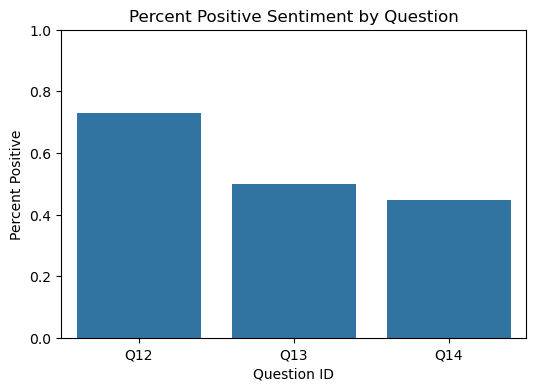

In [209]:
import seaborn as sns
import matplotlib.pyplot as plt

# aggregate: percent positive per question
sentiment_summary = (
    sentiment_df_analysis.groupby("question_id")["sentiment"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(6,4))
sns.barplot(data=sentiment_summary, x="question_id", y="sentiment")

plt.title("Percent Positive Sentiment by Question")
plt.ylabel("Percent Positive")
plt.xlabel("Question ID")

plt.ylim(0,1)
plt.show()


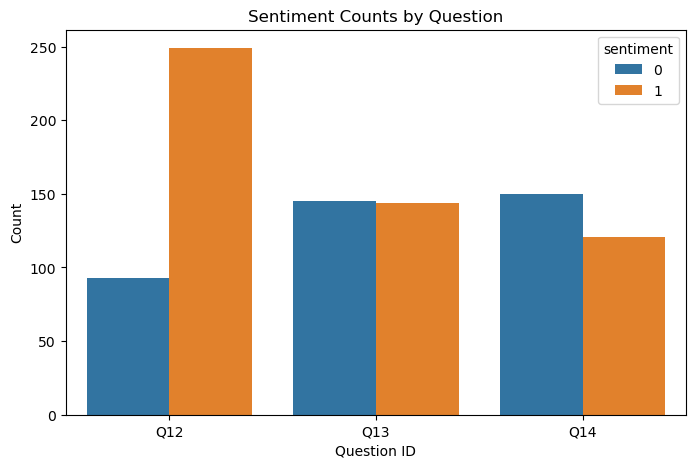

In [210]:
plt.figure(figsize=(8,5))
sns.countplot(
    data=sentiment_df_analysis, 
    x="question_id", 
    hue="sentiment"
)
plt.title("Sentiment Counts by Question")
plt.xlabel("Question ID")
plt.ylabel("Count")
plt.show()


In [ ]:
# Add full sentiment scores to dataframe
sentiment_df_analysis[['neg', 'neu', 'pos', 'compound']] = sentiment_df_analysis['response'].apply(
    lambda x: pd.Series(analyzer.polarity_scores(x))
)


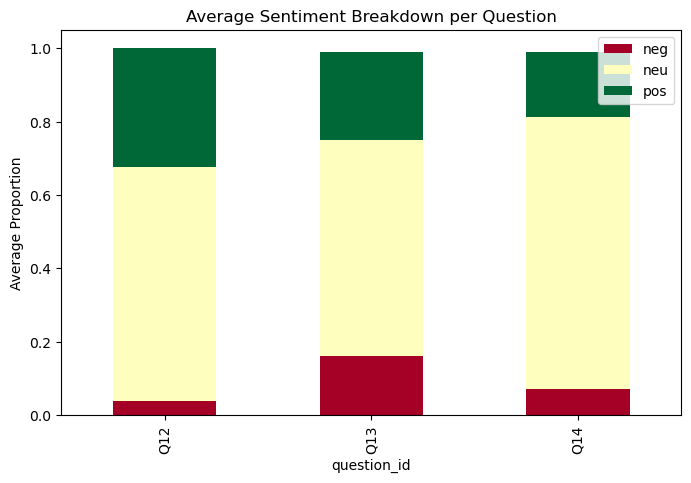

In [214]:
avg_sentiment = sentiment_df_analysis.groupby('question_id')[['neg','neu','pos']].mean()
avg_sentiment.plot(kind='bar', stacked=True, figsize=(8,5), colormap='RdYlGn')
plt.ylabel("Average Proportion")
plt.title("Average Sentiment Breakdown per Question")
plt.show()


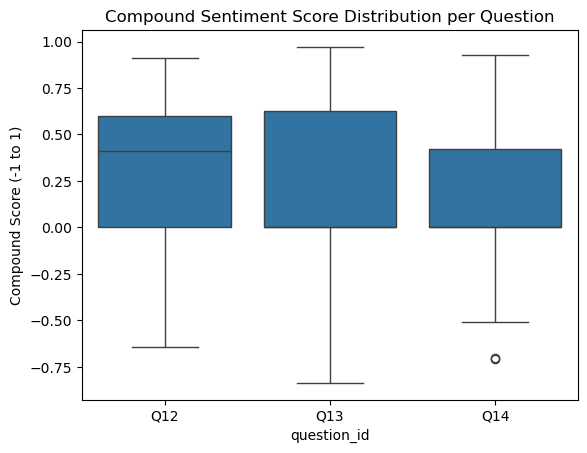

In [215]:
sns.boxplot(data=sentiment_df_analysis, x='question_id', y='compound')
plt.title("Compound Sentiment Score Distribution per Question")
plt.ylabel("Compound Score (-1 to 1)")
plt.show()


In [217]:
# Get top 3 negative responses per question
most_negative_per_question = sentiment_df_analysis.groupby('question_id').apply(
    lambda x: x.nsmallest(3, 'compound')
)[['response', 'compound']]

# Reset index for readability
most_negative_per_question = most_negative_per_question.reset_index(drop=True)
most_negative_per_question


/tmp/ipykernel_174080/2462500944.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  most_negative_per_question = sentiment_df_analysis.groupby('question_id').apply(


,response,compound
0,passed two exam c one without class would sure...,-0.6442
1,"working student allows see opinion topic , als...",-0.4767
2,knowing one struggling .,-0.4215
3,nothing ! sydney great want student great ! or...,-0.8363
4,none . super super great really knew talking ....,-0.7528
5,nothing ! great helpful !,-0.7359
6,allow student get credit outside si late si sh...,-0.7074
7,nothing super beneficial !,-0.7044
8,excused absence sick,-0.5106


In [218]:
# Get top 3 positive responses per question
most_positive_per_question = sentiment_df_analysis.groupby('question_id').apply(
    lambda x: x.nlargest(3, 'compound')
)[['response', 'compound']]

most_positive_per_question = most_positive_per_question.reset_index(drop=True)
most_positive_per_question


/tmp/ipykernel_174080/3283910391.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  most_positive_per_question = sentiment_df_analysis.groupby('question_id').apply(


,response,compound
0,si leader u work together class discus concept...,0.9136
1,'s engaging knowledgeable . easy approach supe...,0.9118
2,dive deeper certain topic concept need help un...,0.9081
3,think great job engaging learning empathy want...,0.9719
4,"amazing job , 'm sure anything need improve . ...",0.9697
5,much say improving performance . ontop informa...,0.9617
6,think overall made great positive impact grade...,0.9260
7,perhaps giving si leader raise good 're . got ...,0.8979
8,’ sure mandatory - liked leader fun ’ think us...,0.8910


In [219]:
import pandas as pd

def top_sentiment_responses(df, n=3):
    results = []

    for q in df['question_id'].unique():
        # Filter for this question
        df_q = df[df['question_id'] == q]

        # Top N positive
        top_pos = df_q.nlargest(n, 'compound')[['response', 'compound']].copy()
        top_pos['sentiment'] = 'Positive'
        top_pos['question_id'] = q

        # Top N negative
        top_neg = df_q.nsmallest(n, 'compound')[['response', 'compound']].copy()
        top_neg['sentiment'] = 'Negative'
        top_neg['question_id'] = q

        # Combine
        results.append(pd.concat([top_neg, top_pos]))

    # Combine all questions
    final_df = pd.concat(results).reset_index(drop=True)
    # Reorder columns
    final_df = final_df[['question_id', 'sentiment', 'compound', 'response']]
    return final_df

# Generate the table
top_responses_df = top_sentiment_responses(sentiment_df_analysis, n=3)
top_responses_df


,question_id,sentiment,compound,response
0,Q12,Negative,-0.6442,passed two exam c one without class would sure...
1,Q12,Negative,-0.4767,"working student allows see opinion topic , als..."
2,Q12,Negative,-0.4215,knowing one struggling .
3,Q12,Positive,0.9136,si leader u work together class discus concept...
4,Q12,Positive,0.9118,'s engaging knowledgeable . easy approach supe...
5,Q12,Positive,0.9081,dive deeper certain topic concept need help un...
6,Q13,Negative,-0.8363,nothing ! sydney great want student great ! or...
7,Q13,Negative,-0.7528,none . super super great really knew talking ....
8,Q13,Negative,-0.7359,nothing ! great helpful !
9,Q13,Positive,0.9719,think great job engaging learning empathy want...
